In [4]:
from neurodiffeq import diff
from neurodiffeq.solvers import Solver1D, Solver2D
from neurodiffeq.conditions import IVP, DirichletBVP2D, BundleDirichletBVP, NoCondition
from neurodiffeq.networks import FCNN, SinActv
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d  import Axes3D

In [5]:
def pde_system(u, x, y):
    return [diff(u, x, order=2) + diff(u, y, order=2)]

conditions = [
    DirichletBVP2D(
        x_min=0, x_min_val=lambda y: torch.sin(np.pi*y),
        x_max=1, x_max_val=lambda y: 0,                   
        y_min=0, y_min_val=lambda x: 0,                   
        y_max=1, y_max_val=lambda x: 0,                   
    )
]
nets = [FCNN(n_input_units=2, n_output_units=1, hidden_units=(512,))]
# monitor = Monitor1D(t_min=0.0, t_max=12.0, check_every=100)

solver = Solver2D(pde_system, conditions, xy_min=(0, 0), xy_max=(1, 1), nets=nets)
solver.fit(max_epochs=2000)
solution = solver.get_solution()

Training Progress:   0%|                                                                | 0/2000 [00:00<?, ?it…

In [6]:
x = np.linspace(0.0, 1.0, 101)
y = np.linspace(0.0, 1.0, 101)
X, Y = np.meshgrid(x, y)
sol_net = solution(X, Y, to_numpy=True)

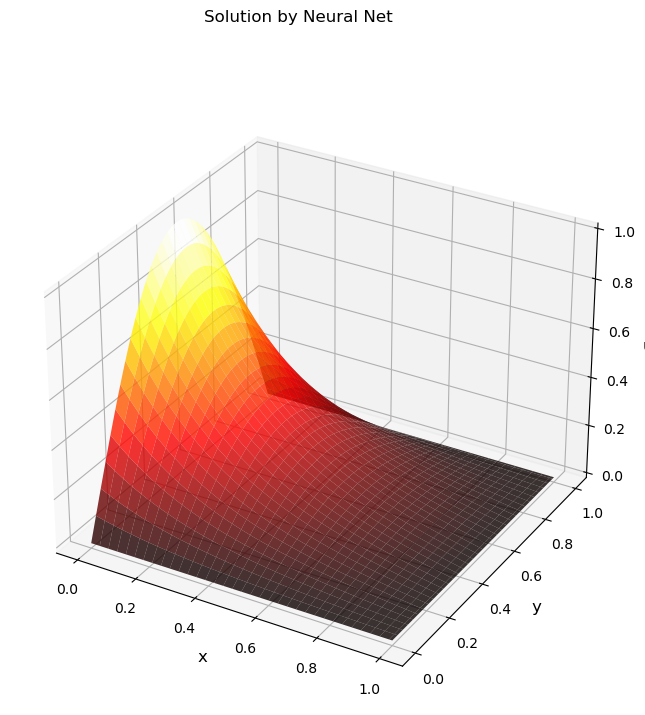

In [10]:
fig = plt.figure(figsize=(16, 8))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, sol_net, cmap='hot', alpha=0.8)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_zlabel('u', fontsize=12)
fig.suptitle('Solution by Neural Net')
plt.savefig('laplace.png')
plt.show()

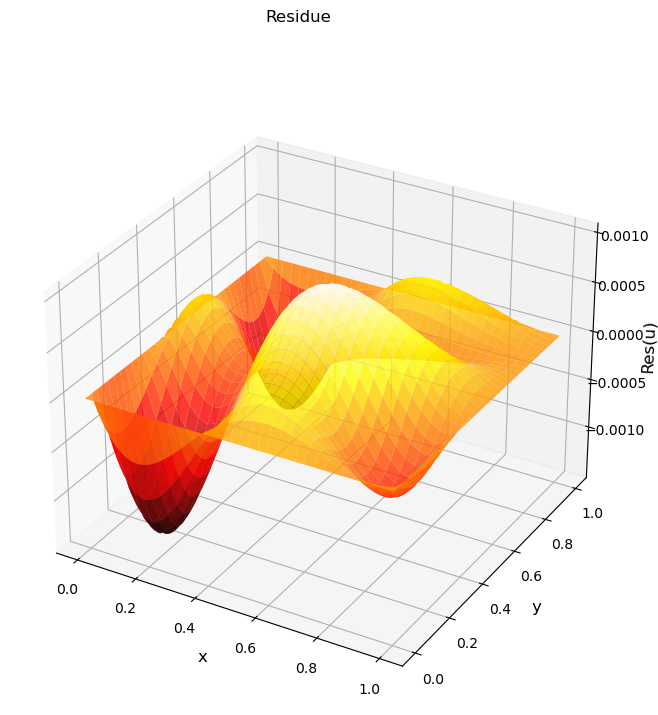

In [12]:
solution_analytical_laplace = lambda x, y: np.sin(np.pi*y) * np.sinh(np.pi*(1-x))/np.sinh(np.pi)
sol_ana = solution_analytical_laplace(X, Y)
residue = sol_net-sol_ana 
fig = plt.figure(figsize=(16, 8))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, residue, cmap='hot', alpha=0.8)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_zlabel('Res(u)', fontsize=12)
plt.savefig('laplaceresidue.png')
fig.suptitle('Residue')
plt.show()